### Laptops e suas especificações
O conjunto de dados do dataset possui especificação de laptop é uma coleção de dados sobre laptops.
Ele contém informações sobre o fabricante, modelo, tipo, tamanho e resolução da tela do laptop, CPU, RAM, disco rígido,
memória, SSD, GPU, sistema operacional, peso e preço. 
O conjunto de dados foi criado extraindo dados da Web e contém 984 entradas exclusivas.
O Dataset foi obtido no kagle: https://www.kaggle.com/datasets/durgeshrao9993/laptop-specification-dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')

In [19]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_euros    1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Média do tamanho das telas

In [21]:
df['Inches'].mean()

15.017191097467379

Maior valor de laptop

In [22]:
df['Price_in_euros'].max()

6099.0

Menor valor de laptop

In [23]:
df['Price_in_euros'].min()

174.0

Média de preço dos laptops

In [24]:
df['Price_in_euros'].mean()

1123.6869915579432

Gerando gráfico de barras com a relação entre marca e o preço

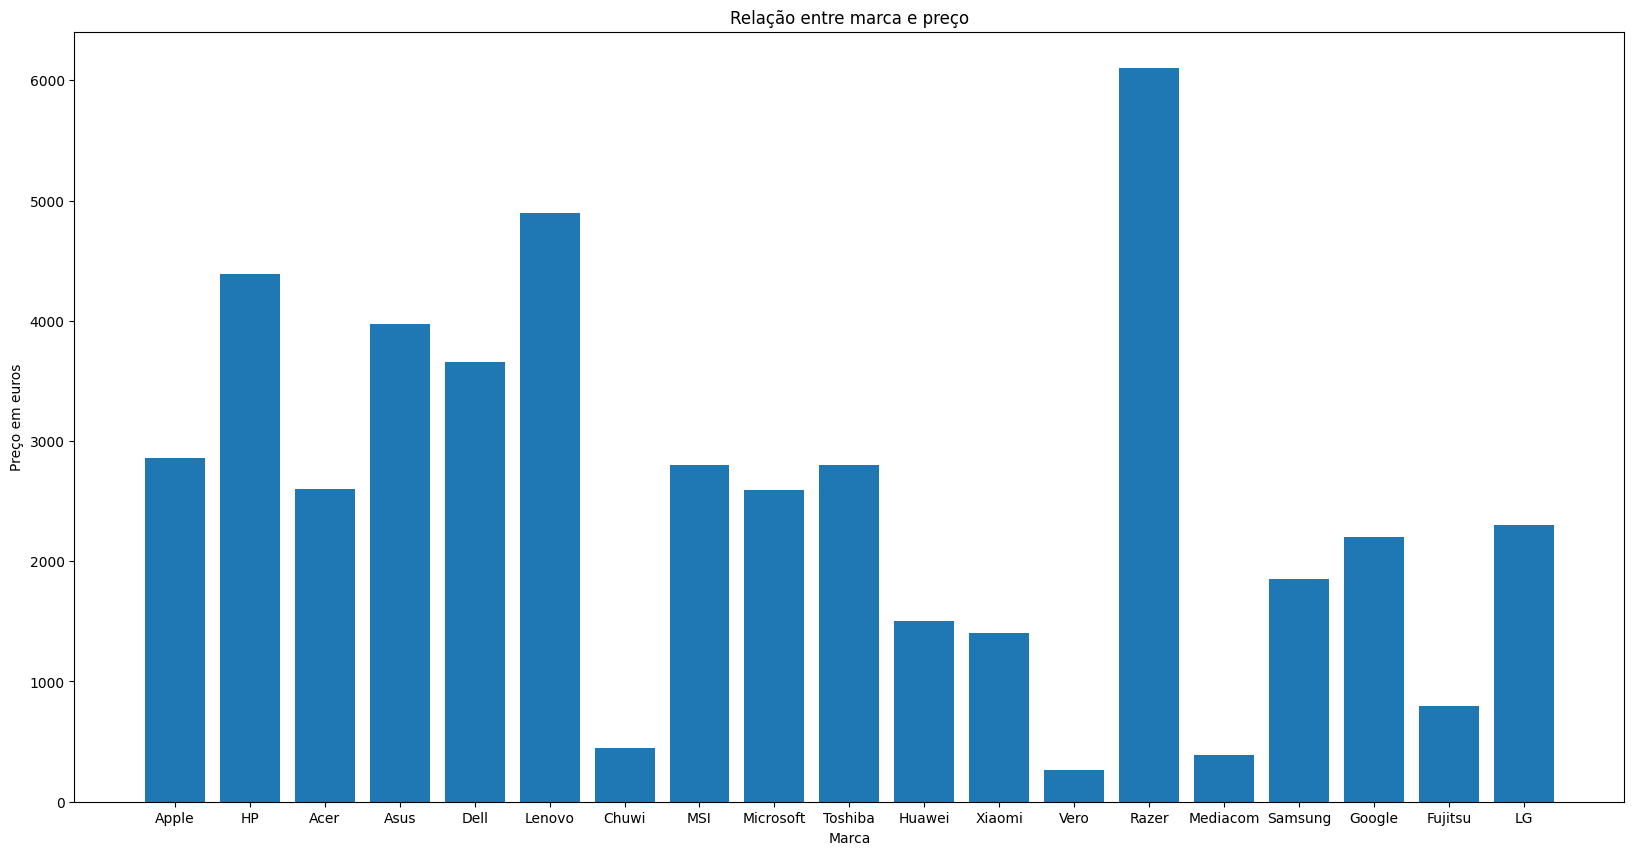

In [25]:
x = df['Company']
y = df['Price_in_euros']


plt.bar(x, y)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xlabel('Marca')
plt.ylabel('Preço em euros')
plt.title('Relação entre marca e preço')
plt.show()



Gráfico de pontos com relação entre preço e marca

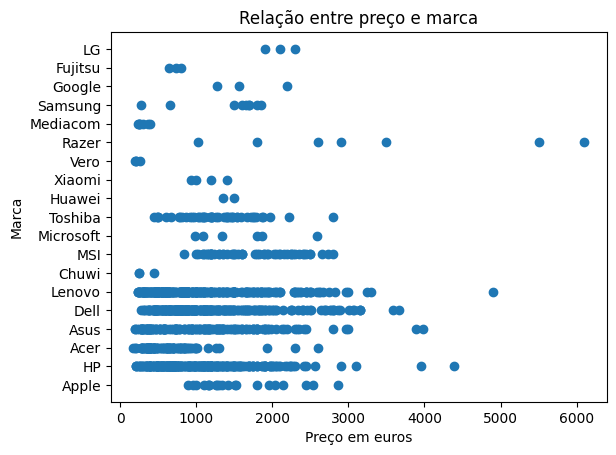

In [26]:
x = df['Price_in_euros']
y = df['Company']

plt.scatter(x, y)
plt.xlabel('Preço em euros')
plt.ylabel('Marca')
plt.title('Relação entre preço e marca')
plt.show()


Gráfico de barras agrupado com a Quantidade de Laptops por Marca e Sistema Operacional

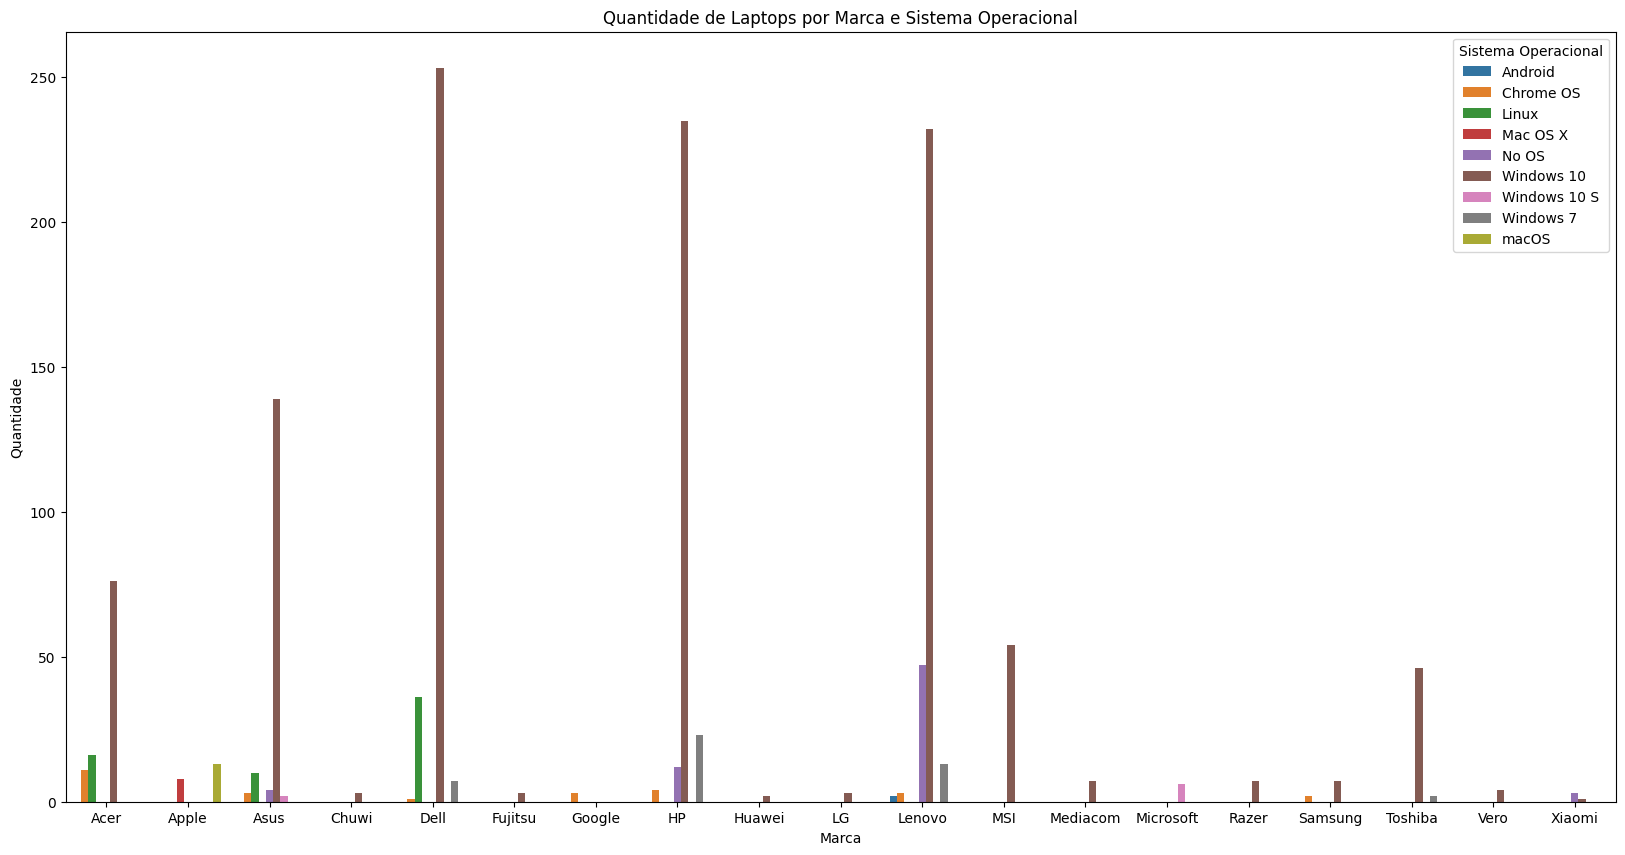

In [27]:
# Crie uma tabela dinâmica com 'Company' como índice, 'OpSys' como colunas e 'count' como valores.
# Preencha os valores NaN (que ocorrem quando uma marca não tem um determinado sistema operacional) com zero.
data = df.groupby(['Company', 'OpSys']).size().reset_index(name='count')

data_pivot = data.pivot_table(index='Company', columns='OpSys', values='count', fill_value=0)

# Transforme a tabela dinâmica em um DataFrame "longo" para trabalhar com o Seaborn
data_melted = data_pivot.reset_index().melt(id_vars='Company', value_name='count')

plt.figure(figsize=(20, 10))
sns.barplot(x='Company', y='count', hue='OpSys', data=data_melted)

plt.title('Quantidade de Laptops por Marca e Sistema Operacional')
plt.xlabel('Marca')
plt.ylabel('Quantidade')
plt.legend(title='Sistema Operacional')



Gráfico de linhas com relação entre os preços medios dos laptops por tamanho de tela

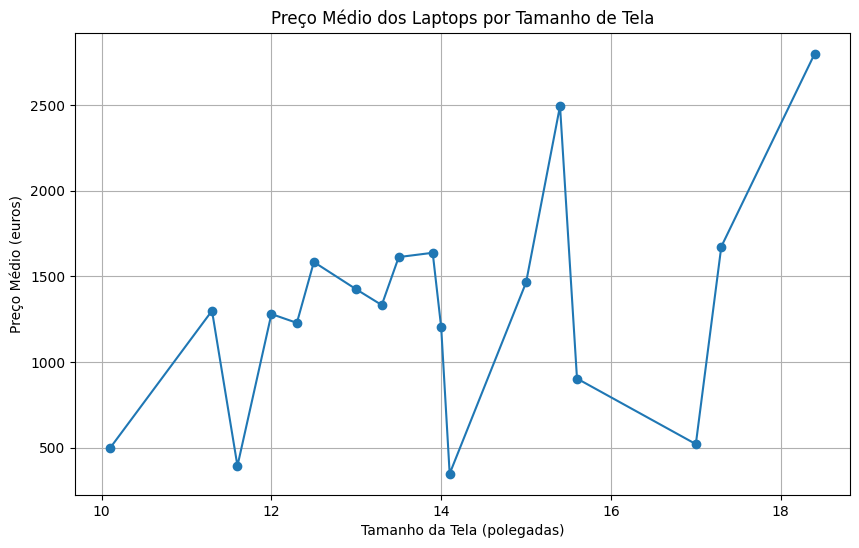

In [29]:
grouped_data = df.groupby('Inches')['Price_in_euros'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel('Tamanho da Tela (polegadas)')
plt.ylabel('Preço Médio (euros)')
plt.title('Preço Médio dos Laptops por Tamanho de Tela')
plt.grid()
plt.show()

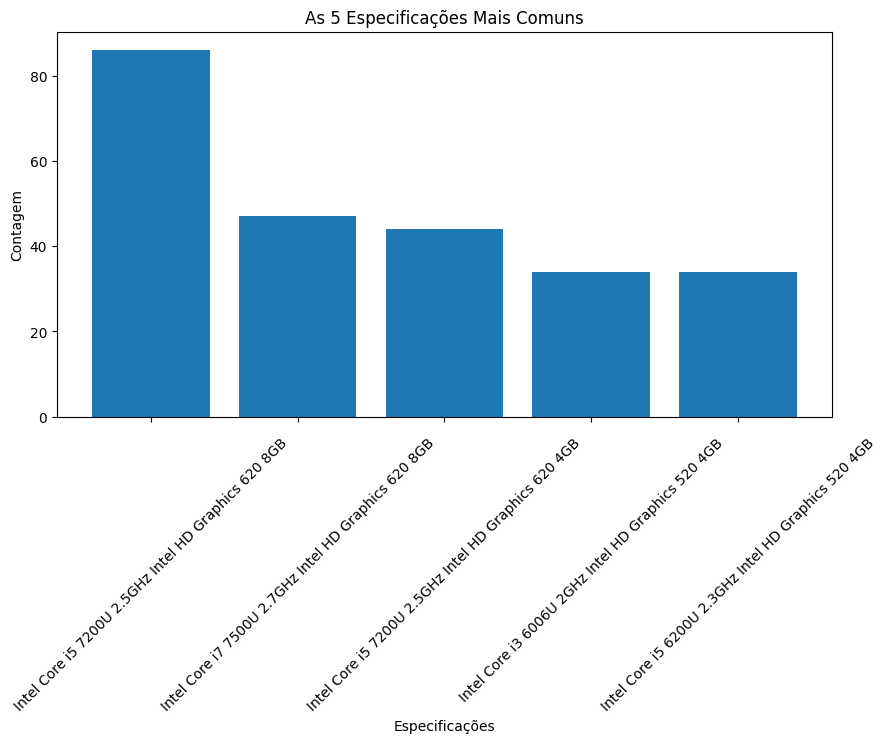

<Figure size 2000x1000 with 0 Axes>

In [30]:
grouped_df = df.groupby(['Cpu', 'Gpu', 'Ram']).size().reset_index(name='Count')


# Adicionando uma nova coluna 'Specifications' que combina 'Cpu', 'Gpu' e 'Ram'
grouped_df['Specifications'] = grouped_df['Cpu'] + ' ' + grouped_df['Gpu'] + ' ' + grouped_df['Ram'].astype(str)

sorted_df = grouped_df.sort_values(by='Count', ascending=False)

# Selecionar as 5 primeiras linhas (as 5 especificações mais comuns)
top_5_specifications = sorted_df.head(5)

plt.figure(figsize=(10,5))
plt.bar(top_5_specifications['Specifications'], top_5_specifications['Count'])
plt.xlabel('Especificações')
plt.ylabel('Contagem')
plt.title('As 5 Especificações Mais Comuns')
plt.xticks(rotation=45, fontsize=10)
plt.tick_params(axis='x', pad=10)
plt.figure(figsize=(20, 10))
plt.show()